(sec:from_scratch_2)=
# 통계 기초

**참고** 

여기서 사용하는 코드는 조엘 그루스(Joel Grus)의 
[밑바닥부터 시작하는 데이터 과학](https://github.com/joelgrus/data-science-from-scratch) 
5장에 사용된 소스코드의 일부를 기반으로 작성되었다.

**주요 내용**

데이터 분석에서 가장 중요한 통계의 기초 개념과 기법을 간단하게 소개한다.
다루는 주제는 다음과 같다.

- 중심경향성: 평균값, 중위수, 최빈값
- 산포도: 분산, 표준편차, 사분범위
- 상관관계: 공분산, 피어슨 상관관계
- 상관관계 대 인과관계

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [114]:
import matplotlib.pyplot as plt
# 한글을 그래프에 표시하기 위해 아래 명령을 터미널에서 실행
%pip install -q koreanize_matplotlib
import koreanize_matplotlib

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정


Note: you may need to restart the kernel to use updated packages.


**matplotlib 한글 설정**

그래프에서 한글을 사용하기 위해 필요한 설정이다. 
윈도우, 우분투 등 운영체제에 따라 다른 설정을 지원한다. 
구글 코랩도 지원한다.

:::{admonition} 그래프 관련 코드
:class: warning

`matplotlib.pyplot` 관련 코드는 내용의 이해를 위한 그래프를 그리기 위한 용도로만 사용된다.
관련 코드를 지금 이해할 필요는 없으며 {ref}`sec:visualization_1`에서 자세히 설명할 때까지 무시해도 된다.
:::

## 데이터 준비

코딩알지의 회원 204명을 대상으로 회원 친구 수를 리스트로 저장하였다고 가정한다.
회원 아이디는 친구가 많은 순서대로 0, 1, 2, ... 등으로 정렬되어 있고,
리스트의 각 항목이 해당 회원의 친구 수이다.
회원의 친구 수는 최대 100명, 최소 1명이다.

In [115]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,
               8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

리스트의 길이, 리스트에 포함된 항목의 최댓값과 최솟값을 이용해서 앞서 언급한 내용을 확인할 수 있다.

In [116]:
print(f"회원수:\t{len(num_friends)}명", 
      f"최대 친구 수:\t{max(num_friends)}명", 
      f"최소 친구 수:\t{min(num_friends)}명", sep='\n')

회원수:	204명
최대 친구 수:	100명
최소 친구 수:	1명


## 데이터 살펴보기

회원들의 친구 수 정보를 다양한 방식으로 파악할 수 있다.

**`collections.Counter` 클래스**

먼저 정해진 수의 친구를 갖는 회원은 몇 명인지 확인해보자.
이를 위해 `collections` 클래스의 `Counter` 클래스를 이용한다.

In [117]:
from collections import Counter

`Counter` 클래스는 사전 자료형인 `dict`의 자식 클래스이며,
`Counter` 클래스의 객체는 리스트, 튜플, 문자열 등 이터러블 자료형을 이용하여
생성한다.
생성된 사전은 이터러블 자료형에 포함된 항목의 사용 횟수를 카운트한 결과를 보관한다.

In [118]:
# Counter 객체 생성
friend_counts = Counter(num_friends)

생성된 객체는 리스트의 항목을 키로, 해당 항목이 사용된 횟수를 키값으로 갖는 
사전 자료형이다.

- 100명의 친구를 갖는 회원: 1명
- 49명의 친구를 갖는 회원: 1명
- ...
- 2명의 친구를 갖는 회원: 17명
- 1명의 친구를 갖는 회원: 22명

In [119]:
friend_counts #객체당 빈도수수

Counter({6: 22,
         1: 22,
         4: 20,
         3: 20,
         9: 18,
         5: 17,
         2: 17,
         10: 15,
         7: 15,
         8: 13,
         15: 4,
         13: 4,
         21: 2,
         19: 2,
         18: 2,
         14: 2,
         12: 2,
         100: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         16: 1,
         11: 1})

친구 수를 x축에, 해당 친구 수 만큼의 친구를 갖는 회원의 수를 y축으로 지정하고 막대그래프를 그려보자.

In [120]:
xs = range(101)                         # x축: 친구 수. 최소 1명에서 최대 100명.
ys = [friend_counts[x] for x in xs]     # y축: 지정된 수 만큼의 친구를 갖는 회원수

`matplotlib.pyplot` 모듈의 `bar()` 함수를 이용하여 x축과 y축에 사용될 값을 지정하면 막대그래프를 그린다.
그래프 그리기에 대해서는 {ref}`sec:visualization_1`와 {ref}`sec:visualization_2` 에서 보다 자세히 다룰 예정이다.

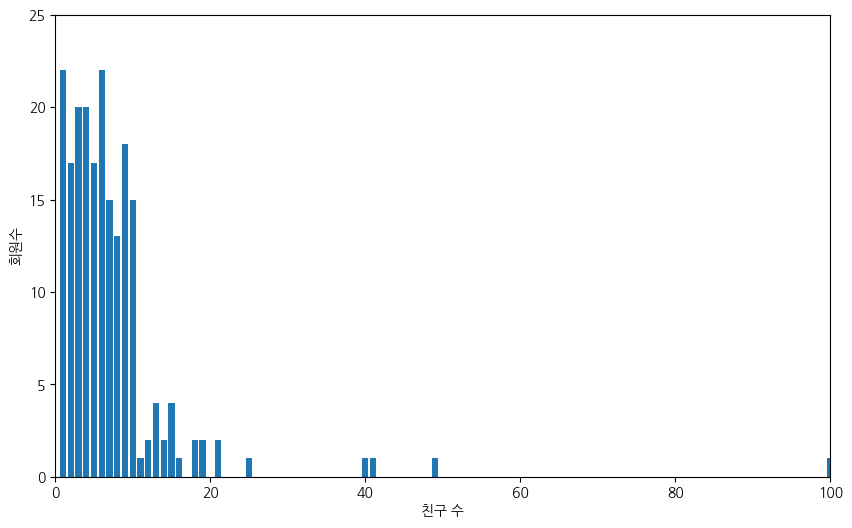

In [121]:
# 막대그래프 그리기
plt.bar(xs, ys)

# 그래프 설정
plt.axis([0, 100, 0, 25])        # x축은 0부터 100까지, y축은 0부터 25까지 눈금 사용
plt.xlabel("친구 수")           # x축 눈금 설명
plt.ylabel("회원수")              # y축 눈금 설명
plt.show()

위 막대그래프에서 다음 두 가지를 한 눈에 알아볼 수 있다.

* 대다수 회원이 10명 이내의 친구를 갖는다.
* 100명의 친구를 가진 회원도 있다.

또 다른 정보를 어떻게 구할 수 있을까? 
언급한 대로 대다수 회원의 친구 수는 어딘가로 몰리는 경향이 있다.
이것을 전문용어로 표현하면 **중심 경향성**이다.
즉, 일반적으로 회원들의 친구 수를 대표하는 중심이 존재한다는 의미이다.

## 중심 경향성과 평균

중심 경향성은 데이터가 어떤 값을 중심으로 몰려 있는 현상을 의미하며 중심이 되는 값으로
보통 세 종류의 **평균**<font size='2'>average</font>을 사용한다.

- 평균값<font size='2'>mean</font>
- 중위수<font size='2'>median</font>
- 최빈값<font size='2'>mode</font>

:::{admonition} 평균 vs. 평균값
:class: info

두 영어 단어 average와 mean은 모두 평균을 의미하는 동의어로 사용된다.
하지만 통계 분야에서 average는 숫자들의 집합(데이터셋)을 대표하는 어떤 값을 가리키는
일반 명사로 사용되며 정의 방식에 따라 다양한 종류의 average가 사용된다.
대표적으로 mean, median, mode 세 종류가 많이 사용된다.

이중에 mean은 일상에서 일반적으로 사용되는 평균값,
즉 주어진 값들을 모두 더한 다음 값들의 개수로 나눈 값을 가리킨다.
여기서는 혼동을 피하기 위해 average는 평균으로, mean은 평균값으로 부른다.
:::

### 평균값

$X$가 임의의 데이터셋을, $n$은 $X$의 크기, 즉 데이터셋에 포함된 샘플의 개수를 가리킨다고 가정하자.
**평균값**<font size='2'>mean</font>은 모든 데이터 샘플의 합을 데이터셋의 크기로 나눈 값이다.
평균값은 보통 그리스 알파벳 뮤($\mu$) 또는 $E(X)$로 표시되며 아래 식으로 계산된다.
$\mu_X$의 아랫첨자 $X$는 평균값 계산에 사용되는 데이터셋을 구분하기 위해 사용한다.

$$
\mu_X = E(X) = \frac{\sum^n_{i=1} X_i}{n}
$$

위 식에서 $\sum^n_{i=1} X_i$은 데이터셋 $X$에 포함된 모든 샘플 $x_i$들의 합을,
$x_i$는 $X$의 $i$ 번째 값을 가리킨다.

**`mean()` 함수**

$X$가 SNS 회원의 친구 수로 이루어진 데이터셋 `num_friends`를 가리킬 때
회원들의 친구 수의 평균값이 7.33명임을 
아래 `mean()` 함수로 구할 수 있다.

- `sum()` 함수: 리스트, 튜플 등에 포함된 항목들의 합 반환
- `len()` 함수: 리스트, 튜플 등에 포함된 항목들의 개수 반환

In [122]:
def mean(xs):
    """
    xs: 리스트로 구현된 데이터셋
    """

    return sum(xs) / len(xs)

In [123]:
mean(num_friends)

7.333333333333333

### 중위수

**중위수**<font size='2'>median</font>는 데이터셋에 포함된 모든 데이터 샘플을
크기 순으로 정렬했을 때 중앙 위치에 자리잡은 값이다. 
데이터셋의 크기가 짝수인 경우 중앙에 위치한 두 수의 
평균값을 중위수로 사용한다.

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/median.png" width="40%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Median">위키백과</a>&gt;</div></p>

**`median()` 함수**

SNS 회원들의 친구 수의 중위수는 6임을 아래 `median()` 함수를 이용하여 확인한다.

In [124]:
# 리스트의 길이가 짝수일 때
def _median_even(xs):
    sorted_xs = sorted(xs)
    high_midpoint = len(xs) // 2
    mean_value = (sorted_xs[high_midpoint - 1] + sorted_xs[high_midpoint]) / 2
    return mean_value

# 리스트의 길이가 홀수일 때
def _median_odd(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    mean_value = sorted_xs[midpoint]
    return mean_value

# 짝수/홀수 구분
def median(xs):
    if len(xs) % 2 == 0:
        return _median_even(xs)
    else:
        return _median_odd(xs)

In [125]:
median(num_friends)

6.0

**평균값 대 중위수**

평균값이 중위수에 비해 데이터셋에 포함된 값들에 민감하다.
예를 들어, `num_friends`에서 최대 친구 수를 100명에서 200명으로 바꾸면
평균값은 7.33명에서 7.82명으로 올라간다.

In [126]:
Y = num_friends.copy()
Y[0]=200
mean(Y)

7.823529411764706

하지만 중위수는 변하지 않는다.

In [127]:
median(Y)

6.0

**이상치와 중위수**

앞서 살펴보았듯이 평균값은 데이터셋의 특정 샘플에 민감하게 반응한다. 
`num_friends`의 경우 친구 수의 평균값이 7.33명인데 100명의 친구가 있는 경우는 매우 특이하다고 할 수 있다.
이처럼 어떤 이유때문인지 확실하지 않지만 다른 데이터 샘플들과 확연히 구분되는 데이터 샘플을
**이상치**<font size='2'>outlier</font>라 부른다. 

평균값은 이상치에 민감하게 반응하기에 경우에 따라 데이터셋에 대한 잘못된 정보를 전달할 수 있다. 
예를 들어, [2013년 3월 당시, 국회의원들의 평균재산은 94억 9000만원](https://www.datadata.link/qa08/)이었다.
하지만 이상치값을 보인 두 의원을 제외하면 23억 3000만원이다. 
당시 현대중공업의 대주주인 정몽준의 약 1조 9249만원 가량의 재산과 고희선 의원의 1984억원의 재산 두 이상치 
포함 여부에 따라 당시 국회의원들의 평균 재산이 매우 많이 달라졌다.
하지만 이 경우에도 중위수는 몇 명의 재산이 매우 많은 사람들의 존재 여부에 거의 의존하지 않는다. 

:::{admonition} 이상치 발생 원인
:class: info

이상치가 데이터셋에 포함되는 이유는 다양하다. 
앞서 언급한 국회의원의 평균재산의 이상치는 정말로 특별한 경우가 포함된 경우이다.
하지만 많은 경우 이상치는 측정 기기의 오류, 측정 방식의 오류, 데이터 처리 오류 등에서 발생한다. 
:::

**중위수와 사분위수**

중위수는 데이터 샘플을 모두 순서대로 정렬했을 때 중앙 위치에 있는 값이며, 
세 개의 **사분위수**<font size='2'>quantile</font> 중에 하나다.
다른 두 개의 사분위수는 하위 25% 위치에 있는 제1사분위수와
상위 25% 위치에 있는 제3사분위수이다. 
즉, 중위수는 상위 50%에 해당하는 제2사분위수에 해당한다.

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/quantile.jpg" width="60%"></div>

**`quantile()` 함수**

`num_friends`의 제1사분위수와 제3사분위수는 각각 3명과 9명임을 `quantile()` 함수를 이용하여 확인할 수 있다.

In [128]:
def quantile(xs, p):
    """
    xs: 데이터셋
    p: 하위 p% 위치
    """
    
    xs_sorted = sorted(xs) # 정렬
    p_index = int(p * len(xs)) # p%에 해당하는 인덱스

    return xs_sorted[p_index]

In [129]:
print("제1사분위수:", quantile(num_friends, 0.25))
print("제3사분위수:", quantile(num_friends, 0.75))

제1사분위수: 3
제3사분위수: 9


### 최빈값

데이터셋에 포함된 데이터 샘플 중에서 가장 많이 출현하는 값이 **최빈값**<font size='2'>mode</font>이다.
아래 그림이 보여주듯이 평균값, 중위수와는 다르게 여러 개의 최빈값이 존재할 수 있다.

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/unimodal-bimodal-multimodal.png" width="80%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://calcworkshop.com/exploring-data/measures-of-center/">9+ Examples on Mean, Median, Mode</a>&gt;</div></p>

**`mode()` 함수**

`num_friends`의 최빈값은 1과 6임을 `mode()` 함수를 이용하여 확인한다.

- `Counter` 객체를 생성하여 키값이 최대가 되는 키를 찾는다.

In [130]:
def mode(xs):
    """
    최빈값
    """
    # Counter 객체 생성
    counts = Counter(xs)
    # 키값의 최댓값 확인
    max_count = max(counts.values())
    # 최대 키값을 갖는 키들의 집합
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes

In [131]:
mode(num_friends)

{1, 6}

최대 친구 수를 20명으로 제한해서 `num_friends` 데이터셋의 최빈값이 두 개 있음을
보다 쉽게 눈으로 확인할 수 있다.
이전 그래프와는 달리 부드러운 선그래프를 함께 그려서
두 개의 가장 높은 봉우리가 존재함을 보다 쉽게 확인하도록 하였다.

ImportError: numpy._core.multiarray failed to import

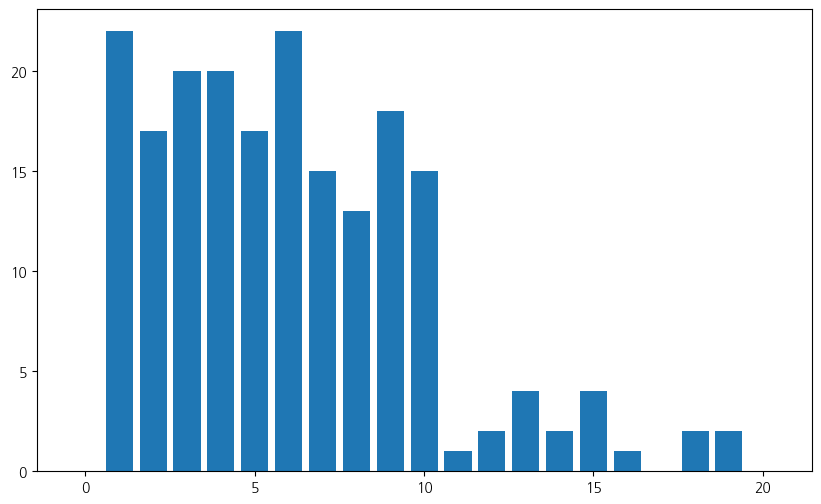

In [134]:
xs = range(21)                      # x축: 친구 수. 최소 1명에서 최대 30명.
ys = [friend_counts[x] for x in xs] # y축: 지정된 수 만큼의 친구를 갖는 회원수

# 막대그래프 그리기
plt.bar(xs, ys)

# 부드러운 선그래프 그리기
import numpy as np                               # numpy 라이브러리 활용
from scipy.interpolate import make_interp_spline # 부드러운 선을 그리기 위해 스플라인 보간법 적용

xs_ys_spline = make_interp_spline(xs, ys)
xs_ = np.linspace(min(xs), max(ys), 500)
ys_ = xs_ys_spline(xs_)
plt.plot(xs_, ys_, 'r')

# 그래프 설정
plt.axis([0, 20, 0, 25])         # x축은 0부터 20까지, y축은 0부터 25까지 눈금 사용
plt.xlabel("친구 수")           # x축 눈금 설명
plt.ylabel("회원수")              # y축 눈금 설명
plt.show()

**비대칭 데이터셋의 평균값, 중위수, 최빈값**

데이터셋이 정규분포를 따르는 경우(아래 중앙 그림)에는 평균값, 중위수, 최빈값이 (거의) 동일하다.
그렇지 않은 경우 비대칭 정도와 모양에 따라 세 값의 순서가 달라진다.

- 왼쪽 꼬리가 긴 경우(아래 왼편 그림): 평균값 &leq; 중위수 &leq; 최빈값
- 오른쪽 꼬리가 긴 경우(아래 왼편 그림): 최빈값 &leq; 중위수 &leq; 평균값

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/mean_mode_median.jpg" width="90%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://medium.com/@nhan.tran/mean-median-an-mode-in-statistics-3359d3774b0b">Mean, Median, and Mode in Statistics</a>&gt;</div></p>

**예제**

앞서 보았듯이 `num_frieds` 데이터셋은 오른쪽 꼬리가 길며,
최빈값, 중강값, 평균값이 실제로 다음 관계를 만족시킨다.

- 주의: `mode(num_friends)`는 집합 자료형이기에 항목의 최댓값을 선택해서 비교에 사용한다.

In [ ]:
# 최빈값 <= 중위수 <= 평균값
max(mode(num_friends)) <= median(num_friends) <= mean(num_friends)

True

## 산포도와 분산

**산포도**는 데이터가 퍼져있는 정도를 측정한다. 
산포도가 0에 가까운 값이면 퍼져있지 않고 하나의 값 주위에 뭉쳐있다는 의미이고,
반대로 0보다 클 수록 데이터의 퍼져있는 정도가 커진다는 의미이다. 
산포도를 측정하는 기준은 보통 아래 네 가지를 사용한다.

* 범위
* 사분범위
* 분산
* 표준편차

### 범위

**범위**<font size='2'>range</font>는 데이터셋에 포함된
데이터 샘플의 최대값과 최소값의 차이를 가리킨다. 
즉, 범위는 데이터 샘플의 최대, 최소값에만 의존한다. 
예를 들어, 최대값이 100, 최소값이 1인 데이터셋은 모두 `num_friends`와 동일한 범위를 갖는다.
이런 이유로 범위가 데이터셋의 산포도 특성을 제대로 반영하지 못할 수도 있다.

**`data_range()`** 함수

`num_friends`의 범위가 99임을 아래 `data_range()` 함수를 이용하여 확인한다.

In [ ]:
def data_range(xs):
    return max(xs) - min(xs)

In [ ]:
data_range(num_friends)

99

### 사분범위

평균, 분산, 표준편차와 함께 범위도 이상치에 민감하다.
데이터의 산포도를 보다 안정적으로 측정하기 위해 제1사분위수와 제3사분위수 사이의 범위인 
**사분범위**<font size='2'>interquantile range</font>를 사용하기도 한다. 

**`iqr()` 함수**

아래 `iqr()` 함수를 이용해서 `num_friends`의 사분범위가 6임을 확인한다.
범위가 99였던 것에 비해 매우 사분범위를 기준으로 보면 산포도가 훨씬 작다.

In [ ]:
def iqr(xs):
    """제3사분위수 - 제1사분위수"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [ ]:
iqr(num_friends)

6

### 분산

**분산**<font size='2'>variance</font>은 데이터가 평균값<font size='2'>mean</font>을 중심으로
얼마나 퍼져있는가를 측정한다.
아래 그래프에서 빨강색으로 표시된 데이터셋의 분산에 비해 파랑색으로 표시된 데이터셋의 분산이 훨씬 크다.

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/Comparison_standard_deviations.svg.png" width="70%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Variance">위키백과</a>&gt;</div></p>

분산은 다음과 같이 평균값과의 오차의 제곱의 평균값으로 계산된다.
데이터셋 $X$의 분산은 보통 $\sigma$ 또는 $\textit{var}(X)$로 나타낸다.

$$
\sigma = \textit{var}(X) = \frac{\sum^n_{i=1} (X_i - \mu_X)^2}{n-1}
$$

:::{admonition} 분모 $(n-1)$의 의미
:class: info

$\sum^n_{i=1} (X_i - \mu_X)$는 데이터셋 $X$에 포함된 값 $X_i$에 대해 평균값과의 오차를 제곱한 값을
모두 더한 값을 가리킨다.

분산을 계산할 때 일반적으로 데이터셋의 크기 $n$으로 나눈다.
하지만 표본 데이터를 이용하여 (일반적으로 알지 못하는) 전체 데이터셋에 대한 분산을 추정하는 
경우 $(n-1)$을 사용한다.
실제로 데이터 분석에서 다루는 데이터는 거의 표본 데이터이다.
:::

**`var()` 함수**

데이터셋의 분산을 계산하는 `var()` 함수를 정의하기 위해
{ref}`sec:from_scratch_1`에서 정의한 내적 함수 `dotV()`를 활용한다.

In [ ]:
# 벡터 내적 함수
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = np.mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)

In [ ]:
def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """
    
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)

`num_friends` 데이터의 분산값은 81.54이다.

In [ ]:
var(num_friends)

81.54351395730706

### 표준편차

분산을 계산하기 위해 평균값과의 오차의 제곱을 사용한다.
따라서 계산된 분산의 단위는 원래 데이터에 사용된 단위의 제곱이며
값도 매우 커질 수 있다.
이런 이유로 분산의 제곱근인 
**표준편차**<font size='2'>standard deviation</font>를 
분산 대신 사용하곤 한다.

표본의 표준편차를 나타내는 기호는 보통 $s$이다.
$s_X$에 사용된 아랫첨자 $X$는 데이터셋을 명기할 때 사용한다.

$$s_X = \sqrt{\textit{var}(X)}$$

**`std()` 함수**

`num_friends`의 표준편차는 9.03임을 아래 `std()` 함수가 계산한다.

- `math` 모듈의 `sqrt()` 함수: 제곱근 계산

In [ ]:
import math

def std(xs):
    return math.sqrt(var(xs))

In [ ]:
std(num_friends)

9.030144736232474

:::{admonition} 이상치와 분산/표준편차
:class: info

분산과 표준편차가 평균값에 의존한다.
따라서 평균값이 이상치에 영향을 받는만큼 분산과 표준편차도 영향을 받는다.
:::

## 선형 상관관계
(-1~1값을 가지며 -1에 가까우면 음의 상관관계 1에 가까우면 양의 상관관계를 가짐)

두 종류의 데이터가 서로 상관이 있는가를 알고자 할 때 상관관계를 파악한다. 
상관관계의 정도를 파악하기 위해 주로 **공분산**<font size='2'>covariance</font> 
또는 **피어슨 상관계수**<font size='2'>Pearson correlation coefficient</font>를 이용하는데,
공분산과 피어슨 상관계수 모두 두 데이터 사이의 **선형 상관관계**<font size='2'>linear correlation</font>를 측정한다. 
선형 상관관계는 한 쪽 데이터가 커지거나 줄어들 때 다른 쪽 데이터도 그에 선형적으로 비례해서 커지거나 줄어드는 관계를 의미한다. 

선형 상관관계를 설명하기 위해 SNS 회원이 하루에 해당 SNS에서 보내는 시간과 친구 수 사이의 연관성을 파악해보자.
회원들의 친구 수는 `num_friends` 변수가 가리키는 값을 그대로 사용하고,
추가로 각 회원이 SNS에서 하루에 보내는 시간(분)이 아래 `daily_minutes` 변수가 가리키는 리스트로 주어졌다.
이전과 동일하게 인덱스는 회원의 아이디를 가리킨다.

In [ ]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,
                 31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,
                 15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,
                 18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
                 36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,
                 33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,
                 30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

### 공분산

동일한 모집단을 대상으로 수집된 두 데이터셋 $X$와 $Y$의 공분산 $cov(X, Y)$는
두 데이터 샘플 $X_i$와 $Y_i$ 각각이 $\mu_X$와 $\mu_Y$를 기준으로
얼마나 다른가를 곱한 값들의 평균값으로 계산된다.

$$
cov(X,Y) = \frac{\sum^n_{i=1} (X_i- \mu_X)(Y_i- \mu_Y)}{n-1}
$$

즉, 공분산은 두 데이터셋 각각의 평균값을 기준으로 얼마나 커지느냐가 상호 어떻게 연관되어 있는지를 계산한다. 
공분산이 양의 값인지, 음의 값인지, 아니면 0에 가까운 값인지에 따라 두 데이터셋 $X$와 $Y$
사이의 상관관계는 아래 그림과 같이 세 종류로 구분된다.

- 음의 공분산: 아래 맨왼쪽 그래프에서처럼 x축의 값이 증가할 수록 y축의 값이 감소하는 경향이 있다. 
- 0의 공분산: 아래 가운데 그래프에서처럼 x축 값 증감과 y축 값의 증감 사이에 별 뚜렷한 선형 관계가 없다. 
- 양의 공분산: 아래 맨오른쪽 그래프에서처럼 x축의 값이 증가할 수록 y축의 값도 증가하는 경향이 있다. 

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/positive_negative_weak_covariance.png" width="60%"></div>

<br>

친구 수와 사용시간 사이의 공분산은 22.43 정도이다.

In [ ]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [ ]:
cov(num_friends, daily_minutes)

22.425435139573068

**공분산의 한계**

어떤 회원에 대해 친구 수와 SNS 사용시간 모두 평균보다 작거나 모두 크면 공분산에 양수의 값이 더해진다.
반면에 친구 수가 평균보다 작지만, 사용시간은 평균보다 크면 음수의 값이 공분산에 더해진다. 
따라서 친구 수와 사용시간 모두 평균값보다 동시에 작느냐 또는 크냐가 공분산 계산에 중요하다.

그런데 예를 들어 친구 수와 SNS 사용시간이 각각의 평균값과의 차이가 크면 클 수록 
공분산 값도 커진다.
하지만 이것은 평균값의 오차가 큰 것이지 친구 수와 사용시간의 연관성이 더 깊다라고 말할 수는 없다.

공분산은 따라서 값이 양이야 음이냐에 따라 양 또는 음의 상관관계인지를 말할 수는 있지만
공분산이 크다고 해서 상관관계가 더 강하다라고 단정지을 수는 없다.
즉, 공분산은 상관관계의 정도를 제대로 반영하지 못한다.

### 피어슨 상관계수

피어슨 상관계수는 공분산을 각 데이터셋의 표준편차의 곱으로 나눈다.
이렇게 하면 두 데이터셋 사이의 **선형** 상관관계가 계산되며,
따라서 공분산의 한계를 해결한다.
두 데이터셋 $X$와 $Y$의 피어슨 상관계수는 다음과 같이 계산한다.

$$
\textit{corrcoef}(X,Y) = \frac{cov(X,Y)}{s_X \cdot s_Y}
$$

**피어슨 상관계수의 특징**

* -1과 1 사이의 값이다.
* 1에 가까울 수록 양의 선형관계가 강해진다.
* -1에 가까울 수록 음의 선형관계가 강해진다.
* 0에 가까울 수록 선형관계가 매우 약해진다.

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/Correlation.png" width="80%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">위키백과</a>&gt;</div></p>

친구 수와 SNS 사용시간 사이의 피어슨 상관계수는 0.25이며, 
이는 두 데이터셋 사이의 상관 정도가 크지 않음을 의미한다. 

In [ ]:
def corrcoef(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    stdev_x = std(xs) # xs의 표준편차
    stdev_y = std(ys) # ys의 표준편차

    if stdev_x > 0 and stdev_y > 0:
        return cov(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0    # 표준편차가 0인 데이터셋과의 선형 상관관계는 없음.


In [ ]:
corrcoef(num_friends, daily_minutes)

0.24736957366478224

SNS의 친구 수와 사용시간 사이의 상관관계를 확인하기 위해
산점도를 그려보면 두 데이터셋 사이의 선형관계가 매우 미약함을 쉽게 볼 수 있다.
근본적인 이유는 그래프 오른쪽 아래의 점에 있다.
즉, 친구가 100명인데 하루 평균 SNS 사용시간이 1분인 사용자로 인해
친구 수와 SNS 사용시간 사이의 선형관계가 있다고 말하기 매우 어렵다.

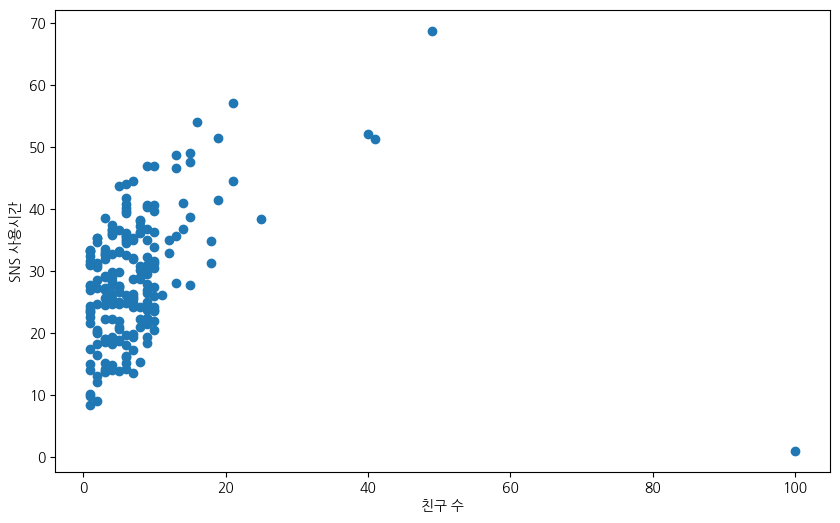

In [ ]:
plt.scatter(num_friends, daily_minutes) # 산점도 그래프 그리기

# 그래프 설정
plt.xlabel("친구 수")
plt.ylabel("SNS 사용시간")
plt.show()

**이상치와 상관관계**

상관관계도 이상치로부터 영향을 받는다. 
예를 들어 SNS 상에서 친구가 많으면 해당 SNS의 사용시간이 길이지는 게 일반적이다.
그런데 위 데이터에서 100명의 친구를 가진 회원의 SNS 사용시간이 1분에 불과하다.
이런 회원의 데이터는 확실히 이상치라고 할 수 있다. 
이제 이 회원의 데이터를 제거하고 피어슨 상관계수를 계산하면 0.57이 나온다.
두 데이터셋의 상관정도가 두 배이상 커진다.

In [ ]:
outlier = num_friends.index(100)    # 이상치의 인덱스

# 데이터셋에서 이상치 제거
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

# 상관계수 계산
corrcoef(num_friends_good, daily_minutes_good)

0.5736792115665601

이상치를 제거한 후의 산점도 그래프는 두 데이터셋의 선형 상관관계를 보다 뚜렷히 보여준다.

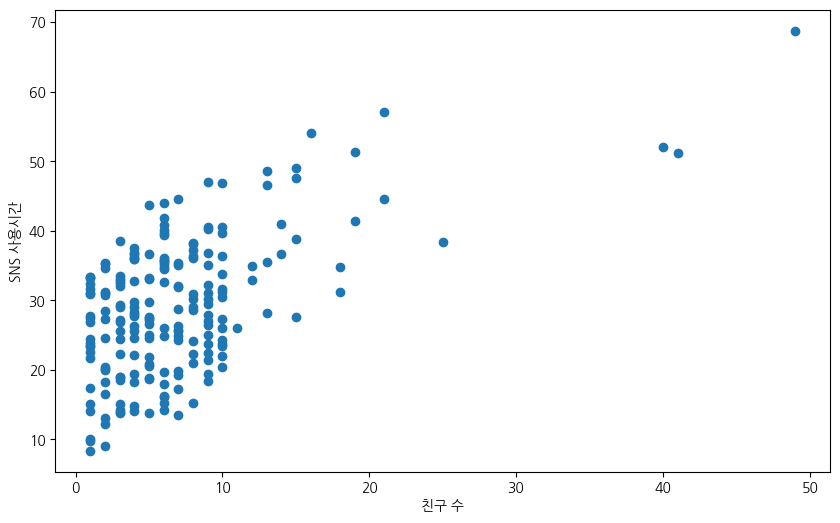

In [ ]:
# 산점도 그리기
plt.scatter(num_friends_good, daily_minutes_good)

# 데이터 설정
plt.xlabel("친구 수")
plt.ylabel("SNS 사용시간")
plt.show()

**피어슨 상관계수의 한계**

상관관계가 0 또는 1에 아주 가깝다고 해서 반드시 어떤 관계도 없다거나 
매우 밀접합 선형관계이다라고 섣부르게 결론 내리면 위험하다. 

**예제**

다음 두 개의 데이터셋 `x`와 `y`를 살펴보자. 

In [ ]:
x = [-2, -1, 0, 1, 2]
y = [ 2,  1, 0, 1, 2]

x와 y의 상관계수는 0이지만 y는 x의 항목의 절댓값을 항목으로 갖는다. 
즉, 이런 데이터는 상관계수로 두 데이터셋의 연관성을 측정할 수 없다.

In [ ]:
corrcoef(x,y)

0.0

**예제**

다음 두 개의 데이터셋 `x`와 `y`를 살펴보자. 

In [ ]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

`x`와 `y`의 상관계수는 1이지만 두 데이터셋 사이의 선형관계가 정말로 완벽하게 선형인지에 대해서는 장담할 수 없다.

In [ ]:
corrcoef(x,y)

1.0

### 상관관계와 인과관계

두 데이터셋 사이에 상관관계가 있다고 해서 한 쪽이 다른 쪽에 영향을 주는 **인과관계**가 있다고 주장할 수 없다. 
왜냐하면 두 데이터셋에 영향을 주는 다른 외부 요인이 존재할 수 있기 때문이다.

예를 들어, 친구 수를 담은 `num_friends`와 SNS 사용시간을 담은 `daily_minutes`의 관계를 살펴보자.
그러면 최소 세 가지 시나리오가 가능하다.

1. SNS에서 많은 시간을 보낼 수록 많은 친구를 사귄다.
1. 많은 친구가 있으니까 SNS에서 시간을 보다 많이 보낸다.
1. SNS에서 많은 정보를 얻을 수 있으니까 사용시간이 길어지고, 그러다 보니까 친구가 늘어난다.

이 중에 어떤 것이 맞는지는 다른 방식으로 확인해봐야 한다. 

### 선형회귀
 == 예측측

친구 수와 SNS 사용시간의 선형관계를 보다 정확히 파악하기 위해
머신러닝의 선형회귀 모델을 활용할 수 있다.
아래 코드는 사이킷런<font size='2'>scikit-learn</font> 라이브러리가
제공하는 선형회귀 모델인 `linear_model`을 훈련시켜서
친구 수와 SNS 사용시간의 선형관계를 보여주는 직선의 기울기와 절편을 계산한다.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn import linear_model

xs = np.c_[np.array(num_friends_good)]
ys = np.c_[np.array(daily_minutes_good)]

lin_model = linear_model.LinearRegression()
lin_model.fit(xs, ys)

t0, t1 = lin_model.intercept_[0], lin_model.coef_[0][0]

print(f"절편:\t {t0}")
print(f"기울기:\t {t1}")

ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: numpy._core.multiarray failed to import

:::{admonition} 머신러닝 공부
:class: info

위 코드를 지금 당장 이해할 필요는 없지만, 머신러닝에 관심이 있는 경우
[핸즈온 머신러닝(3판) 강의노트](https://codingalzi.github.io/handson-ml3/intro.html)를 추천한다.
:::

위 코드를 통해 구한 직선의 기울기와 절편을 이용하여 
친구 수와 SNS 사용시간 사이의 선형관계를 보여주는 직선을
산포도와 함께 그리면 다음과 같다.

NameError: name 't0' is not defined

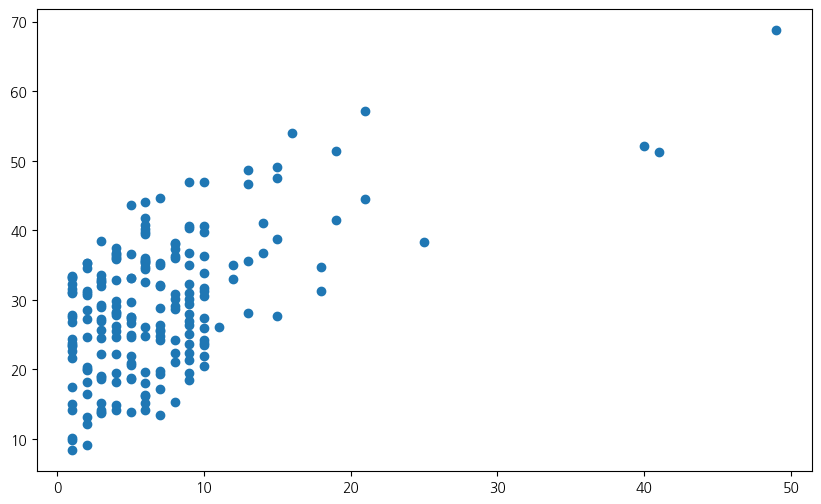

In [ ]:
# 산점도 그리기
plt.scatter(num_friends_good, daily_minutes_good)

# 직선 그리기
X=np.linspace(0, 50, 100)
plt.plot(X, t0 + t1*X, "r")

# 데이터 설정
plt.xlabel("친구 수")
plt.ylabel("SNS 사용시간")
plt.show()

## 연습문제

참고: [(실습) 통계 기초](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-from_scratch_2.ipynb)